In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import numpy as np
import seaborn as sns

In [2]:
las1 = lasio.read("E:/IIT ISM BOOKS/3rd sem/Formation Evaluation/PROJECT/Gorgonichthys_1_suite3_supercombo_log[1] (1).las",engine='normal')
las2 = lasio.read("E:/IIT ISM BOOKS/3rd sem/Formation Evaluation/PROJECT/gorgonichthys_1_wire_public_2010_sdb.las",engine='normal')
well1 = las1.df().reset_index()
well2 = las2.df().reset_index()

In [3]:
print(las2.curves)

Mnemonic  Unit  Value  Description                                                            
--------  ----  -----  -----------                                                            
DEPTH     M                                                                                   
BS        IN           Values changed using TEXT_EDIT                                         
CALI      IN           Values changed using TEXT_EDIT                                         
DENS      G/C3         5       Bulk Density                                                   
DENSC     G/C3         12      Bulk Density Correction                                        
DRHO      G/C3         12      Bulk Density Correction                                        
DT        US/F         Curve clear from 3924.64 to 3930.54                                    
DTCO      US/F         Curve clear from 3924.64 to 3930.54                                    
DTSH      US/F         Curve clear from 3872.27 to

In [4]:
up = 3900
down = 4200

NTG ratio = 0.8452436974789916


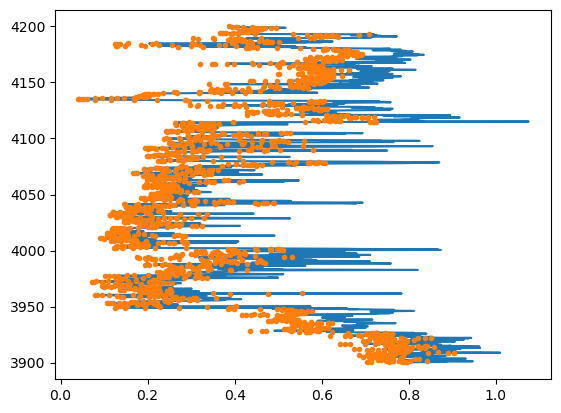

In [45]:
cal = np.array(well2.CALI)[(well2.DEPTH>=up)&(well2.DEPTH<=down)]
G = np.array(well2.GR[(well2.DEPTH>=up)&(well2.DEPTH<=down)])
d = np.array(well2.DEPTH)[(well2.DEPTH>=up)&(well2.DEPTH<=down)]
bit = np.array(well2.BS)[(well2.DEPTH>=up)&(well2.DEPTH<=down)]

R1 = np.array(well2.RESS[(well2.DEPTH>=up)&(well2.DEPTH<=down)])
R5 = np.array(well2.RESD[(well2.DEPTH>=up)&(well2.DEPTH<=down)])
RM = np.array(well2.RESM[(well2.DEPTH>=up)&(well2.DEPTH<=down)])

N = np.array(well2.TNPH[(well2.DEPTH>=up)&(well2.DEPTH<=down)])
Den = np.array(well2.RHOB[(well2.DEPTH>=up)&(well2.DEPTH<=down)])

#Volume of shale calculation 

Gmin = 25.29724
Gmax = 176.99184

I_gr = [((i - Gmin)/(Gmax-Gmin)) for i in G]
for i in range(len(I_gr)):
    if(I_gr[i]<0):
        I_gr[i] = 0
    if(I_gr[i]>1):
        I_gr[i]=1
N_c=np.zeros(len(N))
D_c=np.zeros(len(N))
N_c1=np.zeros(len(N))
D_c1=np.zeros(len(N))
N_sh=[]
D_sh=[]
rho_fl = 1.2
for i in range(len(G)):
    if (I_gr[i]<0.6):
        rho_ma = 2.65
    else:
        rho_ma=2.75
    phi_d = [((rho_ma - i)/(rho_ma - rho_fl)) for i in Den]
    
for i in range(len(G)):
    if (I_gr[i]>0.6):
        D_sh.append(phi_d[i])
        N_sh.append(N[i])
        
N_phi_sh = np.mean(N_sh)
D_phi_sh = np.mean(D_sh)
for i in range(len(G)):
    if (I_gr[i]>0.6):
        N_c[i] = N[i]  + 0.04
        N_c1[i] = N[i]  + 0.04 - I_gr[i]*N_phi_sh
        D_c[i] = phi_d[i]  + 0.04
        D_c1[i] = phi_d[i]  + 0.04- I_gr[i]*D_phi_sh
    else:
        N_c[i] = N[i] + 0.04
        D_c[i] = phi_d[i] + 0.04
        N_c1[i] = N[i] + 0.04
        D_c1[i] = phi_d[i] + 0.04    
#total porosity
t_phi =[((((D_c[i]**2)+(N_c[i]**2))/2)**(0.5)) for i in range(len(G))]
t_phi1 =[((((D_c1[i]**2)+(N_c1[i]**2))/2)**(0.5)) for i in range(len(G))]
#Saturation calculation(Archie's)

m=2
a=1
n=2

Rw = 0.1
Sw = [(((a * Rw) / (R5[i] * (t_phi[i]**m)))**(1/n)) for i in range(len(d))]



#Saturation Calculation(Simandoux)

R_tot_sh=[]
for i in range(len(d)):
    if(cal[i]<10.5):
        if(I_gr[i]>0.6) or (cal[i]>12.5):
            R_tot_sh.append(R5[i])
R_sh = np.mean(R_tot_sh)

Sw_S = [((a*Rw)/(2*(t_phi[i]**m)))*((((4*(t_phi[i]**m)/(a*Rw*R5[i])+((I_gr[i]/R_sh)**2))**0.5))-(I_gr[i]/R_sh)) for i in range(len(d))]
plt.plot(Sw,d)
plt.plot(Sw_S,d,'.')

#NTG
H_netp,count,dist = 0,0,0.1524
dist = 0.1524
flag = np.zeros(len(d))
for i in range(len(d)):
    if((I_gr[i]<0.5) and (t_phi[i]>0.05) and (Sw[i]<0.5)):
        flag[i]=1
        count+=1
H_netp = count*dist
Gross = (3996-3948)+(4115-4002)+(4045-4042)+(4141-4133.5)+(4200-4193)
NTG = H_netp/Gross
print('NTG ratio =',NTG)

In [54]:
def multi_combo_log1(top_depth,bottom_depth):
    
    logs=well2
    fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(12,24), sharey=True)
    fig.suptitle("Multiple Log Display", fontsize=24)
    fig.subplots_adjust(top=0.9,wspace=0.1)
    
# setting for all axes
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        
        
        ax11 = ax[0].twiny()
        ax11.spines['top'].set_position(('outward',0))
        ax11.plot(cal, d, '-g', label= "Caliper")
        ax11.plot(bit, d, '-r', label= "Bit Size")
        ax11.set_xlabel('Caliper',color='g')    
        ax11.tick_params(axis='x', colors='g')
        ax11.grid(True)
        
        ax12 = ax[0].twiny()
        ax12.spines['top'].set_position(('outward',40))
        ax12.set_xlabel('Bit Size',color='r')    
        ax11.axvline(x=10.5,color='m')
        
        ax2 = ax[1].twiny()
        ax2.spines['top'].set_position(('outward',0))
        ax2.plot(G, d, '-b', label= "Gamma Ray")
        
        #ax1.axhline(y=d[3775],color='m')
        ax2.axvline(x=25.29724,color='y')
        ax2.axvline(x=80.10780,color='orange')
       #plt.axvline(x=23.985337,color='k',linewidth='0.5')
        ax2.axvline(x=176.99184,color='y')
        ax2.set_xlabel('Gamma Count',color='b')    
        ax2.tick_params(axis='x', colors='b')
        ax2.grid(True)
        
        ax31 = ax[2].twiny()
        #ax31.set_xlim(1,1000)
        ax31.spines['top'].set_position(('outward',0))
        ax31.set_xscale('log')
        ax31.plot(R1, d, '-y', label= "Shallow")
        ax31.set_xlabel('Shallow Resistivity',color='y')    
        ax31.tick_params(axis='x', colors='y')
        ax31.grid(True)
        
        ax32 = ax[2].twiny()
        #ax32.set_xlim(1,1000)
        ax32.spines['top'].set_position(('outward',40))
        ax32.set_xscale('log')
        ax32.plot(R5, d, '-r', label= "Deep")
        ax32.set_xlabel('Deep Resistivity',color='r')    
        ax32.tick_params(axis='x', colors='r')
        ax32.grid(True)
        
        ax33 = ax[2].twiny()
        #ax33.set_xlim(1,1000)
        ax33.spines['top'].set_position(('outward',80))
        ax33.set_xscale('log')
        ax33.plot(RM, d, '-k', label= "Medium")
        ax33.set_xlabel('Medium Resistivity',color='k')    
        ax33.tick_params(axis='x', colors='k')
        ax33.grid(True)
        

        ax41 = ax[3].twiny()
        ax41.grid(True)
        ax41.set_xlim(0,0.4)
        ax41.invert_xaxis()
        ax41.spines['top'].set_position(('outward', 0))
        ax41.plot(N, d, '-c', label= "Neutron")
        #ax21.fill_betweenx(N_c,Den,color='yellow',alpha=.2,label='porosity')
        ax41.set_xlabel('Neutron Porosity', color= 'c')
        ax41.tick_params(axis='x', colors= 'c')
        
        ax42 = ax[3].twiny()
        ax42.set_xlim(1.4, 2.95)
        #ax22.invert_xaxis()
        ax42.spines['top'].set_position(('outward', 40))
        ax42.plot(Den, d, 'g', label = "Density")
        ax42.set_xlabel('Bulk Density', color = 'g')
        ax42.tick_params(axis= 'x', colors='g')
        ax42.axhline(y=3948,color='r',linestyle='--')
        ax42.axhline(y=3996,color='r',linestyle='--')
        ax42.axhline(y=4002,color='r',linestyle='--')
        ax42.axhline(y=4115,color='r',linestyle='--')
        ax42.axhline(y=4042,color='r',linestyle='--')
        ax42.axhline(y=4045,color='r',linestyle='--')
        ax42.axhline(y=4133.5,color='r',linestyle='--')
        ax42.axhline(y=4141,color='r',linestyle='--')
        ax42.axhline(y=4193,color='r',linestyle='--')
        ax42.axhline(y=4200,color='r',linestyle='--')
        
        ax51 = ax[4].twiny()
        #ax51.set_xlim(0, 0.4)
        #ax22.invert_xaxis()
        ax51.spines['top'].set_position(('outward', 40))
        ax51.plot(t_phi, d, 'orange', label = "Tphi")
        ax51.set_xlabel('Total Porosity', color = 'orange')
        
        ax51.tick_params(axis= 'x', colors='orange')
        
        ax6 = ax[5].twiny()
#       ax42.set_xlim(1.65, 2.95)
        ax6.invert_xaxis()
        ax6.spines['top'].set_position(('outward', 0))
        ax6.plot(Sw, d, 'cyan', label = "Sw")
        ax6.set_xlabel('Water Saturation', color = 'cyan')
        ax6.plot(Sw_S,d,'blue',label='Siman')
        ax6.tick_params(axis= 'x', colors='cyan')
        
        ax7 = ax[6].twiny()
        ax7.set_xlim(0.1, 1)
        #ax7.invert_xaxis()
        ax7.spines['top'].set_position(('outward', 0))
        ax7.plot(flag, d, 'orange', label = "Flag")
        ax7.fill_betweenx(d,0,flag,color='orange',alpha=.5,label='porosity', edgecolor='brown', hatch='*')
        ax7.set_xlabel('NTG Flagging', color = 'orange')
        ax7.tick_params(axis= 'x', colors='orange')

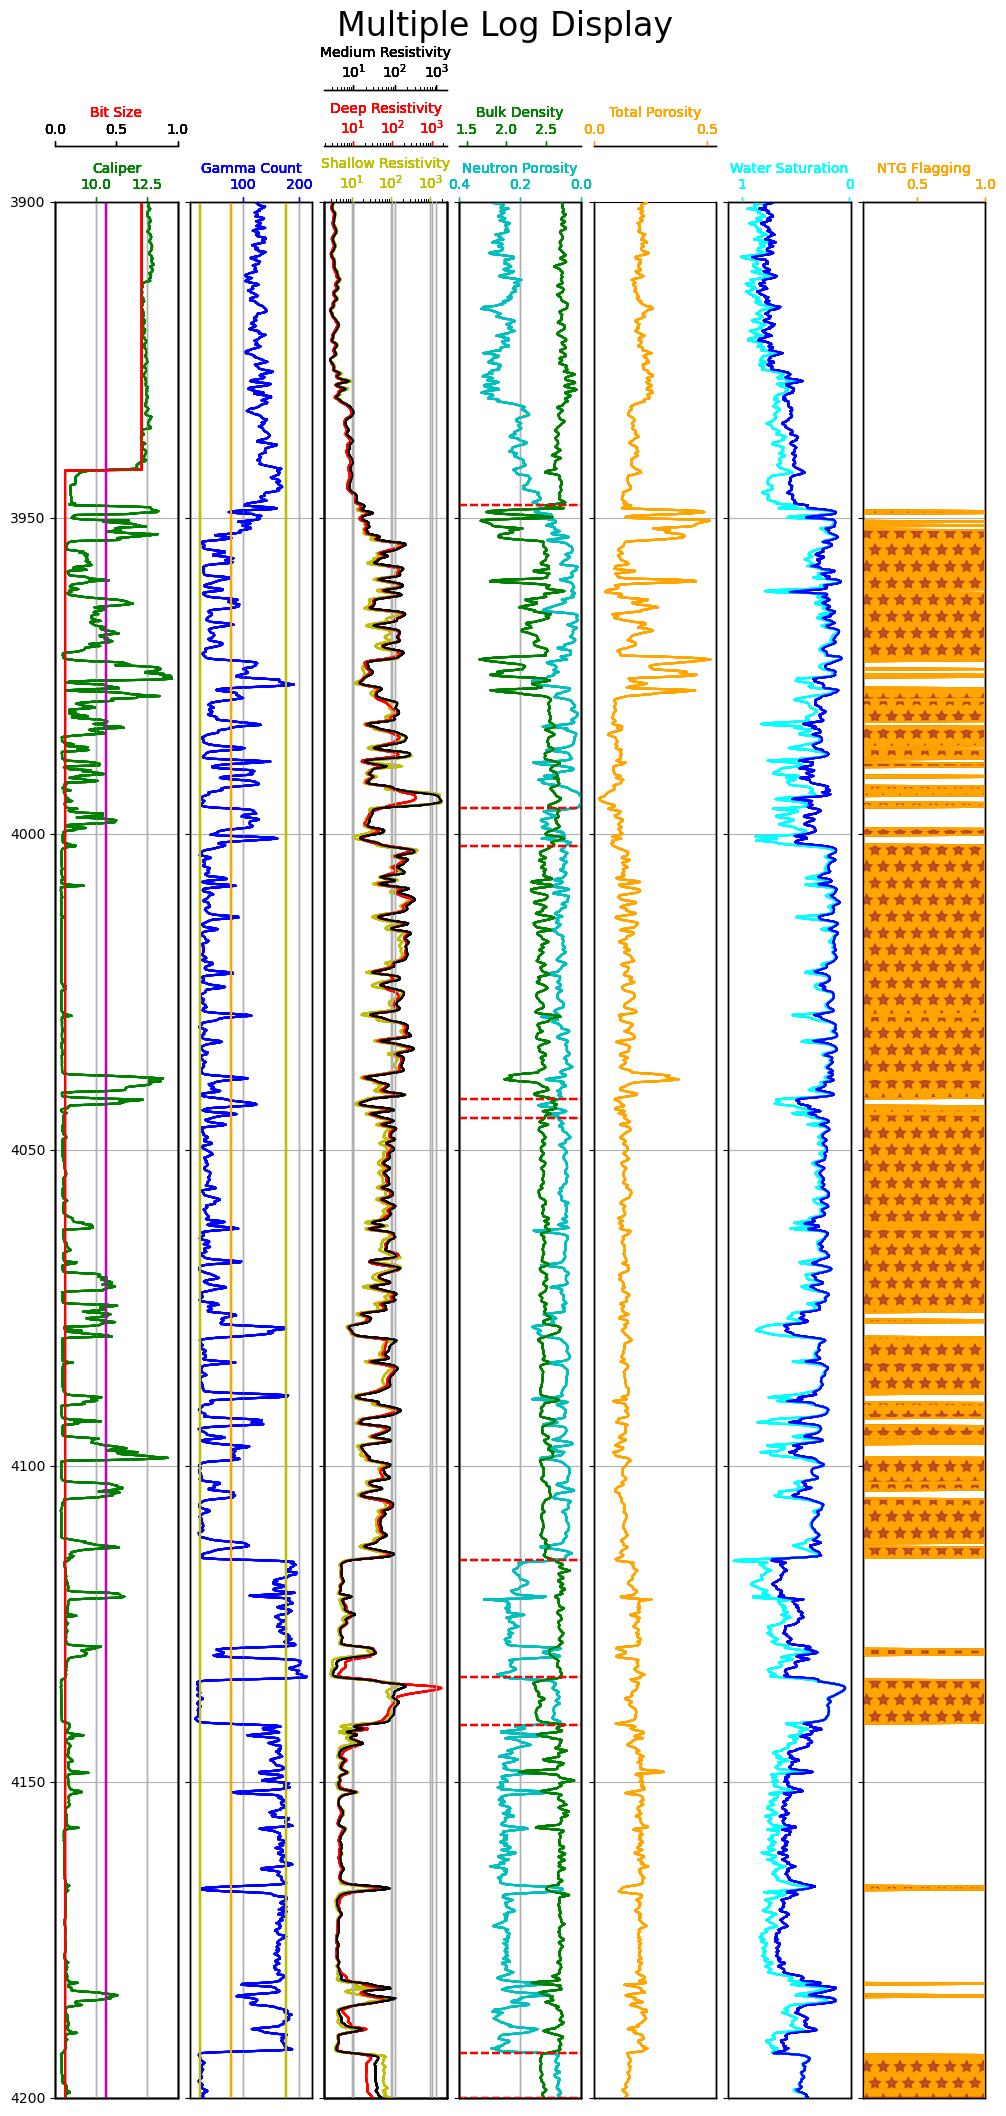

In [55]:
top = up
bottom = down
multi_combo_log1(top, bottom)

In [41]:
def multi_combo_log2(top_depth,bottom_depth):
    
    logs=well2
    fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(12,24), sharey=True)
    fig.suptitle("Multiple Log Display", fontsize=24)
    fig.subplots_adjust(top=0.9,wspace=0.1)
    
# setting for all axes
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        
    
        ax41 = ax[3].twiny()
        ax41.grid(True)
        ax41.set_xlim(0,0.4)
        ax41.invert_xaxis()
        ax41.spines['top'].set_position(('outward', 0))
        ax41.plot(N, d, '-c', label= "Neutron")
        #ax21.fill_betweenx(N_c,Den,color='yellow',alpha=.2,label='porosity')
        ax41.set_xlabel('Neutron Porosity', color= 'c')
        ax41.tick_params(axis='x', colors= 'c')
        
        ax42 = ax[3].twiny()
        ax42.set_xlim(1.4, 2.95)
        #ax22.invert_xaxis()
        ax42.spines['top'].set_position(('outward', 40))
        ax42.plot(Den, d, 'g', label = "Density")
        ax42.set_xlabel('Bulk Density', color = 'g')
        ax42.tick_params(axis= 'x', colors='g')
        ax42.axhline(y=3948,color='r',linestyle='--')
        ax42.axhline(y=3996,color='r',linestyle='--')
        ax42.axhline(y=4002,color='r',linestyle='--')
        ax42.axhline(y=4115,color='r',linestyle='--')
        ax42.axhline(y=4042,color='r',linestyle='--')
        ax42.axhline(y=4045,color='r',linestyle='--')
        ax42.axhline(y=4133.5,color='r',linestyle='--')
        ax42.axhline(y=4141,color='r',linestyle='--')
        ax42.axhline(y=4193,color='r',linestyle='--')
        ax42.axhline(y=4200,color='r',linestyle='--')
    
        ax7 = ax[6].twiny()
#       ax42.set_xlim(1.65, 2.95)
        #ax7.invert_xaxis()
        ax7.spines['top'].set_position(('outward', 0))
        ax7.plot(flag, d, 'magenta', label = "Flag")
        ax7.fill_betweenx(d,0,flag,color='magenta',alpha=.5,label='porosity', edgecolor='black', hatch='*')
        ax7.set_xlabel('NTG Flagging', color = 'magenta')
        ax7.tick_params(axis= 'x', colors='magenta')